C:\Users\bashc\AppData\Local\Temp\ipykernel_21552\3792211981.py:17: RuntimeWarning: invalid value encountered in sqrt
  return 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )


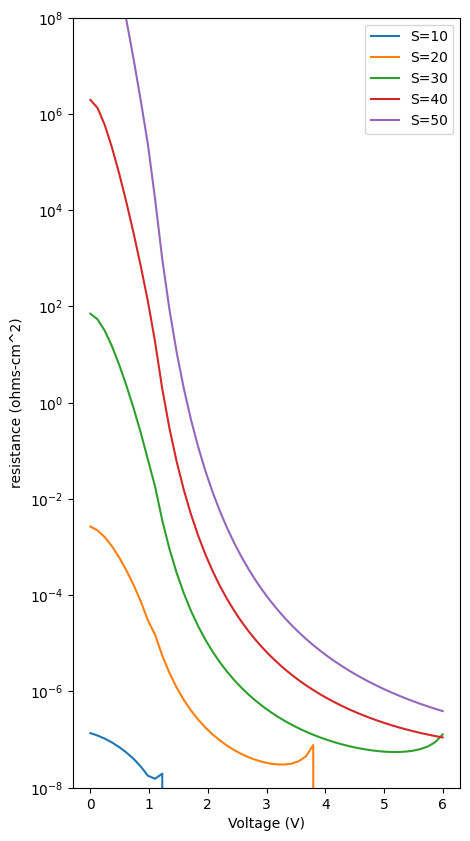

Whole Device Resistance (ohms)  phi=5.2 eV, k=3.6, gap=4nm, v=300mV
3.9267771056773116e+29
Edge resistance with Water undercut(ohms) 5nm undercut,  phi=5.2 eV, k=3.6, gap=4nm, v=300mV
1.2607895779310428e+34
Total Resistance with water undercut
3.926654808519452e+29
Current at 300mV = 7.64e-31
Current with undercut at 300mV = 7.64e-31


In [2]:

import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
from nptdms import TdmsFile
import os
  
from scipy.signal import savgol_filter

def I(v,S,phi0,K): #returns amps/m^2
    s1=6/K/phi0

    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))

    return 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )

S0 = [10,20,30,40,50]
phi00= 1
K0=6
R0=0
I0=0

v=np.linspace(.0001, 6, num=50)
plt.figure(figsize=[5,10])
for s in S0:
    R=v/I(v,s ,phi00 ,K0)
    plt.semilogy(v,R*1e6, label="S=%d"%s)
plt.ylim([1e-8,1e8])    
plt.ylabel("resistance (ohms-cm^2)")
plt.xlabel("Voltage (V)")
plt.legend()
plt.show()
print("Whole Device Resistance (ohms)  phi=5.2 eV, k=3.6, gap=4nm, v=300mV")
rWhole=.3/(I(.3,40 ,4 ,3.4) * 1e-12)
print(rWhole) #resistance/um at 1 um^2  

print("Edge resistance with Water undercut(ohms) 5nm undercut,  phi=5.2 eV, k=3.6, gap=4nm, v=300mV")
rEdge=.3/(I(.3,40 ,4 ,80) * 5/1000*2* 1e-12)
print(rEdge) #resistance/um at 1 um^2  

rTotal = 1/(1/rWhole+1/rEdge)
print("Total Resistance with water undercut")
print(rTotal)

print("Current at 300mV = %.2e"%  (.3/rWhole)   )
print("Current with undercut at 300mV = %.2e"%  (.3/rTotal)   )

7.853981633974483e-13
[1.59785799e+07 2.20480402e+02 2.65709380e-02]


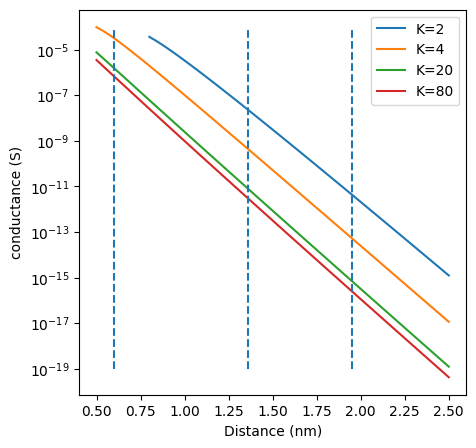

In [23]:

s = np.linspace(5, 20, num=50)
v = .1
phi00= 2.26
K=[2,4,20,80]
R0=0
I0=0
radius = 5 #nm
#convert to area in cm^2
area = np.pi*(radius*1e-7)**2
print(area)
plt.figure(figsize=[5,5])
for k in K:
    if k==4.1:
        s = np.linspace(10, 25, num=50)
    elif k==2:
        s = np.linspace(8, 25, num=50)
    else:
        s = np.linspace(5, 25, num=50)
    R=v/I(v,s ,phi00 ,k)*1e6/area 
    
    plt.semilogy(s/10,1/R, label="K=%d"%k)
s=(.6)
plt.vlines(.6,1e-19,1e-4,linestyles='dashed')
plt.vlines(1.36,1e-19,1e-4,linestyles='dashed')
plt.vlines(1.95,1e-19,1e-4,linestyles='dashed')

s=np.array([.6,1.36,1.95])
k=4
print ( 1/(v/I(v,s*10 ,phi00 ,k)*1e6/area )*1e12/2)
plt.ylabel("conductance (S)")
plt.xlabel("Distance (nm)")
plt.legend()
plt.show()

C:\Users\bashc\AppData\Local\Temp\ipykernel_37644\2918920215.py:13: RuntimeWarning: divide by zero encountered in divide
  s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )


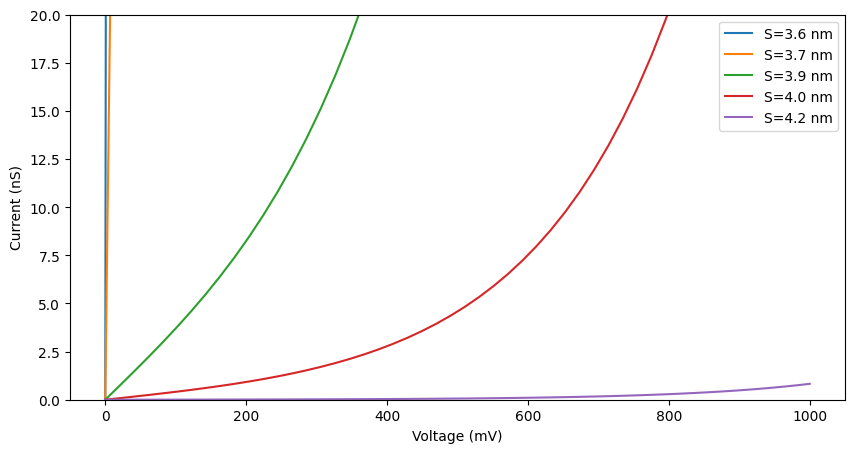

In [6]:
S0 = [36,37,39,40,42]
v=np.linspace(0, 1, num=50)
phi00=4.5
K0=80
R0=0
I0=0
plt.figure(figsize=[10,5])
for s in S0:
    R=I(v,s ,phi00 ,K0)*1e-4*1e6*1e6*1e9
    plt.plot(v*1000,R*1e6, label="S=%.1f nm"%(s/10))
plt.ylim([0,20])
plt.ylabel("Current (nS)")
plt.xlabel("Voltage (mV)")
plt.legend()

[6.65020396e+29 3.87873693e+29 2.20550247e+29 1.23236136e+29
 6.79938187e+28 3.71579910e+28 2.01560860e+28 1.08688488e+28
 5.83259860e+27 3.11746461e+27 1.66065295e+27 8.82087469e+26
 4.67383652e+26 2.47118463e+26 1.30413385e+26 6.87100547e+25
 3.61476407e+25 1.89919331e+25 9.96657571e+24 5.22468641e+24
 2.73624581e+24 1.43175332e+24 7.48569976e+23 3.91089990e+23
 2.04186354e+23 1.06538166e+23 5.55561989e+22 2.89552177e+22
 1.50835826e+22 7.85380826e+21 4.08759212e+21 2.12656371e+21
 1.10592038e+21 5.74928725e+20 2.98784486e+20 1.55225981e+20
 8.06196445e+19 4.18595532e+19 2.17286197e+19 1.12761185e+19
 5.85036176e+18 3.03463632e+18 1.57375201e+18 8.15973779e+17
 4.22990488e+17 2.19231748e+17 1.13605260e+17 5.88598350e+16
 3.04907777e+16 1.57924631e+16]
[2.73710560e+27 1.34712805e+27 6.64028240e+26 3.27796137e+26
 1.62044594e+26 8.02139685e+25 3.97576552e+25 1.97295738e+25
 9.80195336e+24 4.87504497e+24 2.42711420e+24 1.20954885e+24
 6.03331174e+23 3.01207831e+23 1.50499575e+23 7.52565

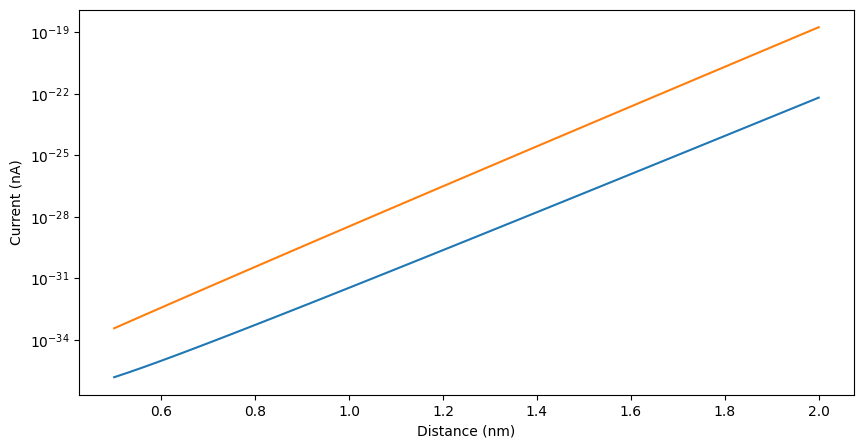

In [19]:
import numpy as np
s = np.linspace(5, 20, num=50)
v=.1 
phi00=4.5
K0=np.array([2,80])
R0=0
I0=0
plt.figure(figsize=[10,5])

for k in K0:
    R=I(v,s ,phi00 ,k)*1e-4*1e6*1e6*1e9
    print(R)
    plt.semilogy(s/10,1/(R*1e6))
 
plt.ylabel("Current (nA)")
plt.xlabel("Distance (nm)")
plt.show()

In [3]:


def loadData2(fileName):
    tdms_file = TdmsFile.read(fileName)
    props=tdms_file.properties
     
        
    currents={}
    bias=[]
    times=[]
    ts=1/50000.
    for group in tdms_file.groups():
        for channel in group.channels():

            channel_name = channel.name 
           
            if len(channel_name)>2 and channel_name.lower()!='bias' and channel_name.lower()!='time':
                channel_name=channel_name[:2]
            if (channel_name=="Time"):
                ts=(channel[-1]-channel[0])/len(channel)
                times.append(np.array(channel))
            elif channel_name=="Bias":
                bias = np.array(channel)
            else:
                currents[channel_name.strip()]= np.array(channel)
                if len(times)==0:
                    times = channel.time_track()
                    ts=(times[-1]-times[0])/len(times)

    return (props,ts,currents,bias)

 


In [4]:
gFolder=r"S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\Electrochemical Measurements\On chip Au deposition\SX01-B4"
def loadGamry(file):
    with open(file) as f:
        lines = f.readlines()
        
    for i in range(len(lines)):
        if lines[i].startswith("CURVE"):
            heads = lines[i+1].strip().split('\t')
            cols={}
            for j  in range(len(heads)):
                cols[heads[j]]=[]
                
            for j in range(i+3,len(lines)):
                if lines[j].startswith("CURVE"):
                    break 
                data = lines[j].strip().split('\t')
                for k  in range(len(heads)):
                    if '...' not in data[k]:
                        cols[heads[k]].append(float(data[k]))
            break
    return  np.array(cols['Vf']), np.array( cols['Im'])*1e9
        

d:\PythonProj\mlStuff\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\PythonProj\mlStuff\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


W8 4.893403730932675


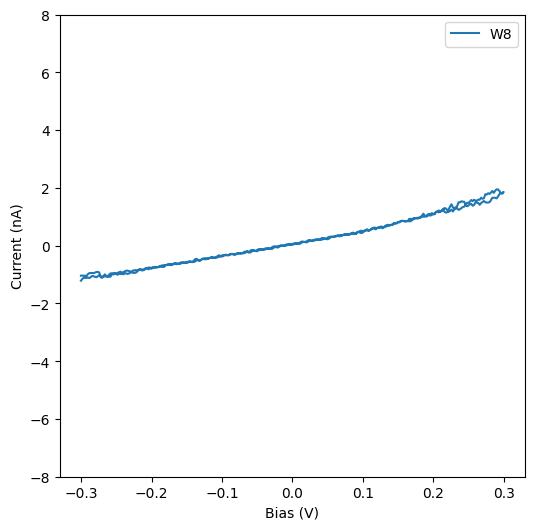

In [5]:
def loadFolder(gFolder):
    channels={}
    fileList=  glob.glob( gFolder + "\\*Check*.DTA", recursive=False)
    fileList = sorted( fileList, key=lambda x: os.path.getmtime(x))
    for file in fileList:
        bias,current=loadGamry(file)
        
        back = np.mean(current[bias<-.2])
        fore = np.mean(current[bias>.2])
        if back<0:
            channel = os.path.basename(file).replace('SX01-E4-','')
            channel = channel.split('_')[0]
            channels[channel]={'bias':bias,'current':current}
    return channels

currents = loadFolder(gFolder)
ECResist ={}
plt.figure(figsize=[6,6])
for current in currents:
    if current=='W8':
        b=currents[current]['bias']
        c= currents[current]['current']
        ECResist[current]=np.polyfit(b[b>-.25],c[b>-.25] ,1)
        print(current, ECResist[current][0])
        plt.plot(currents[current]['bias'],currents[current]['current'], label=current)
plt.xlabel("Bias (V)")
plt.ylabel("Current (nA)")    
plt.ylim([-8,8])
plt.legend()
plt.show() 

In [6]:
props,ts,currents,bias =loadData2(r'S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\230413_2020552_DI_Rinse_IV_MonitorIV.tdms' )

FileNotFoundError: [Errno 2] No such file or directory: 'S:\\Research\\Chip Fabrication Meeting Notes (Do not share without permission)\\SharedData\\DEMP_Measurements\\EC Deposited Chips\\230413_2020552_DI_Rinse_IV_MonitorIV.tdms'

S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\W055 A4\S1\230515-185644 .csv
S1 S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\W055 A4\S2\230515-185746 .csv
S2 S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\W055 A4\S3\230515-185846 .csv
S3 S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\W055 A4\S4\230515-190013 .csv
S4 S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\W055 A4\S5\230515-190130 .csv
S5 S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\W055 A4\S6\230515-190238 .csv
S6 S:\Research\Chip Fabrication Meeting Notes (Do not s

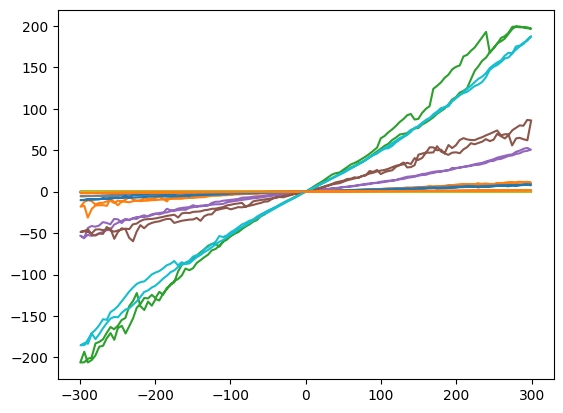

In [ ]:
from glob import glob
import numpy as np
fileList = glob(r'S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\DEMP_Measurements\EC Deposited Chips\W055 A4\**\*.csv', recursive=True)
currents={}
for file in fileList:
    print(file)
    dir = os.path.basename( os.path.dirname(file))
    if dir!='Overnight':
        print(dir, end=' ')
        data = np.genfromtxt(file, delimiter=',', skip_header=1)
        bias = data[:,2]/1000
        currents[dir]= data[:,3] 
        plt.plot(data[:,2],data[:,3])
 

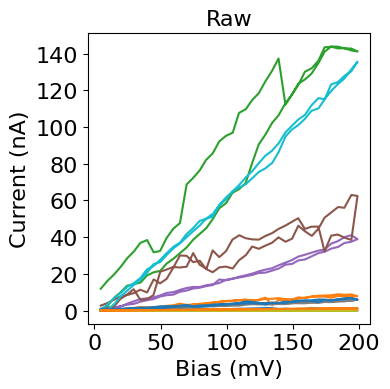

In [ ]:
Amplitude=.4

fontsize = '16'
size = 16
SamplingRate = 50000

Method="Real"
plt.figure(figsize=(4,4))
cc=0

filteredCurves=[]
for channel in currents: 
 
    cCurrent =np.array( currents[channel])
    bbias =np.array( bias)
    bbias= bbias[:int(len(cCurrent)/2)]
    cCurrent = cCurrent[:int(len(cCurrent)/2)]
    
    #if channel not in 'C8C6C5C3':
    #    continue
    #if np.max(np.abs(cCurrent))<5:
    #    continue
    # Phase =10
    # Frequency = 1.25
    # bbias =-2* Amplitude/np.pi * np.arcsin(np.cos( 2.0 * np.pi * np.linspace(0,len(cCurrent),len(cCurrent))  / SamplingRate * Frequency + Phase/180.0*np.pi))
    bbias=bbias-.1
    if Method=='Real':
        
        # slope = np.diff(bbias,prepend=0)
        # bbias, cCurrent= bbias[slope>0], cCurrent [slope>0]
        bbias, cCurrent= bbias[bbias>0], np.abs( cCurrent [bbias>0])
        # bbias, cCurrent= bbias[cCurrent<6.5], cCurrent [cCurrent<6.5]
        # slope = np.diff(bbias,prepend=0)
        # bbias[slope<0]=np.nan
        
        #if len(cCurrent)<1:
        #    continue
        
        plt.plot(bbias*1000, cCurrent-np.min(cCurrent) ,label=channel)
        filteredCurves .append( {'channel':channel,'bias':bbias,'current':cCurrent})
        
        plt.ylabel("Current (nA)", fontsize = fontsize)
        plt.xlabel("Bias (mV)", fontsize = fontsize)
        plt.title("Raw", fontsize = fontsize)
    else:
        # slope = np.diff(bbias,prepend=0)
        # bbias, cCurrent= bbias[slope>0], cCurrent [slope>0]
        # bbias, cCurrent= bbias[bbias>0], np.abs( cCurrent [bbias>0])
        # bbias, cCurrent= bbias[cCurrent<6.5], cCurrent [cCurrent<6.5]
        # slope = np.diff(bbias,prepend=0)
        # bbias[slope<0]=np.nan
        cCurrent-=np.min(cCurrent)

        
        if Method=="Schottky":
            plt.semilogy(np.sqrt( bbias*1000), cCurrent/300/300 ,label=channel)
            plt.ylabel("Current (nA/$K^2$)", fontsize = fontsize)
            plt.xlabel("Bias (mV$^{1/2}$)", fontsize = fontsize)
            plt.title("Schottky", fontsize = fontsize)
            
        #DT FNT
        if Method=="DT":
            bbias,cCurrent= 1/np.abs(1000* bbias ),( np.abs( cCurrent ))/((bbias*1000)**2)
            cCurrent[cCurrent<=0]=np.nan
            bbias,cCurrent = bbias[bbias<5], cCurrent[bbias<5]
            bbias= savgol_filter(bbias, 101, 1)
            cCurrent= savgol_filter(cCurrent, 51, 3)
            plt.semilogy( bbias ,cCurrent ,label=channel)
            plt.ylabel("Current/$Volts^2$ (nA/$mV^2$)", fontsize = fontsize)
            plt.xlabel("Driving Bias (1/mV)", fontsize = fontsize)
            plt.title("Direct or FordHeim", fontsize = fontsize)
            #plt.xlim([0,2])
             
        
        #PFE
        if Method=="PFE":
            bbias,cCurrent=  np.abs(1000* bbias )**.5,( np.abs( cCurrent ))/(bbias*1000)
            
            cCurrent= savgol_filter(cCurrent, 51, 3)
            #cCurrent[cCurrent<=0]=np.nan
            plt.semilogy( bbias ,cCurrent ,label=channel)
            plt.ylabel("Current/Volts  (nA/mV)", fontsize = fontsize)
            plt.xlabel("Driving Bias ($mV^{1/2}$)", fontsize = fontsize)
            plt.title("Poole Frenkle", fontsize = fontsize)
            plt.ylim([1e-3,1e-1])
        
        #Hoping
        if Method=="Hopping":
            bbias,cCurrent=  np.abs(1000* bbias ),( np.abs( cCurrent )) 
            cCurrent[cCurrent<=0]=np.nan
            plt.semilogy( bbias ,cCurrent ,label=channel)
            plt.ylabel("Current  (nA)", fontsize = fontsize)
            plt.xlabel("Driving Bias (mV)", fontsize = fontsize)
            plt.title("Hopping Conductance", fontsize = fontsize)
            plt.ylim([1e-3,10])
    
    plt.xticks(size = size)
    plt.yticks(size = size)
    #plt.legend( fontsize=13)
    plt.tight_layout()
    
    # cc+=1
    # if cc>3:
    #     break
    
#

d:\PythonProj\mlStuff\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


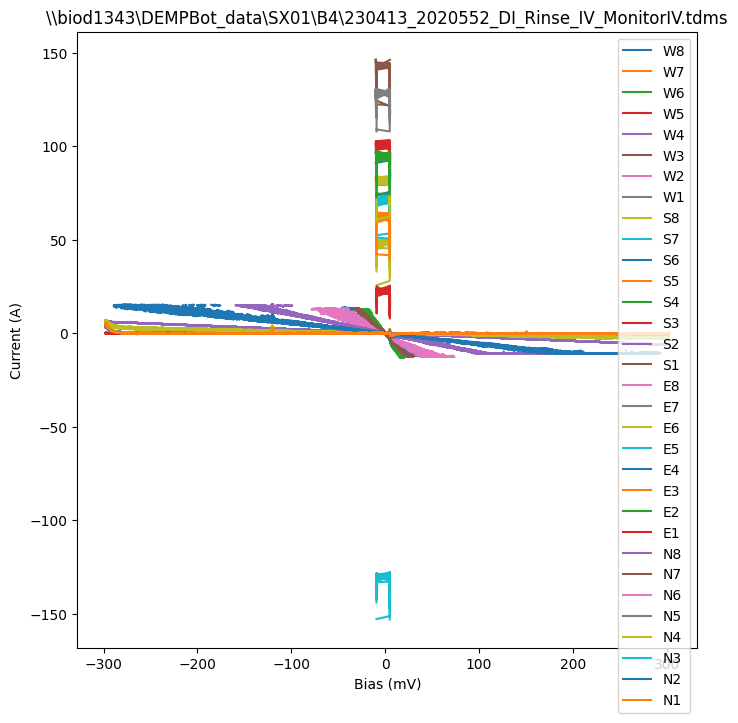

In [ ]:
cc=0
for file in fileList:
    outs={}

    props,ts,currents,bias =loadData2(file )
    
    bias = np.roll(bias,-38)
    plt.figure(figsize=(8,8))
    for channel in currents: 
        try:
            cCurrent = currents[channel]/-.48
            bbias = bias[:int(.9*len(bias))]
            cCurrent = cCurrent[:int(.9*len(cCurrent))]
            
            bbias = bbias[np.abs(cCurrent)<13]*1000
            cCurrent = cCurrent[np.abs(cCurrent)<13]
        
            bbiasSG = savgol_filter(bbias, 51, 3) 
            dB=np.diff(bbiasSG,prepend=0)
            
            upperCurveC = cCurrent[(dB>0) & (bbias>-100) & (bbias<0)]
            upperCurveB = bbias[(dB>0)  & (bbias>-100) & (bbias<0)]
            p=np.polyfit(upperCurveB,upperCurveC,1)
            #print(f"{channel},{p[1]}")
            
            mean = np.mean(cCurrent[dB>0])
            cCurrent[dB<0]=np.nan
            
            plt.plot(bbias, (cCurrent) -p[1] , label=channel)
        except:
            pass
         
    plt.xlabel("Bias (mV)")
    plt.ylabel("Current (A)")
    plt.title(file)
    plt.legend()
    plt.show()
    cc+=1        
    break 

34.86149324485187 4.999999999940139 79.6360561568771 0.1
33.99051328610719 4.999999999124192 79.93676602827217 0.1
32.75037774929083 4.99999999958263 79.76319115330571 0.1
37.02695200071594 4.999999999927867 79.82344153692529 0.1
44.79695081243162 2.7501775309624477 79.99999937945569 0.1
33.18874924032343 4.999999999994347 79.9493714452369 0.1
36.938099316759356 4.999999993257022 79.580269347384 0.1
34.18961357047881 4.999999999997514 79.97150258590909 0.1
36.94530772720317 4.99999999962953 79.74684943605408 0.1
38.11713287221448 4.999999991321008 1.3164171400650124 0.1
34.11915400918714 4.999999999999996 79.95449600242353 0.1
34.85952381175741 4.999999999990738 79.97936241124775 0.1


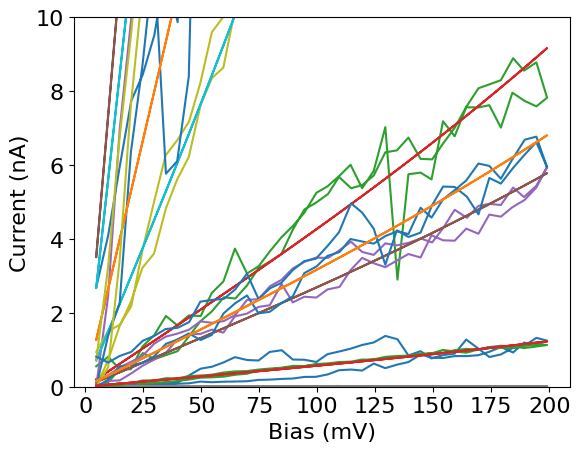

name,value,initial value,min,max,vary
S,34.8595238,30,10.0000000,100.000000,True
phi0,5.00000000,4.5,3.0000e-04,5.00000000,True
K,79.9793624,2,1.00000000,80.0000000,True
R,0.10000000,0.1,0.00000000,0.10000000,True
area,1.00000000,1,1.0000e-13,1.05000000,True


In [ ]:

def I(v,S,phi0,K,R): #returns amps/m^2
    s1=6/K/phi0

    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))

    return 1e-30*R*v+1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )

 
def residual(pars, x, data=None):
    model =I(x,pars['S'] ,pars['phi0'] ,pars['K'], pars['R'])*1e-4*1e6*1e6*1e9 *1e3
    model[(np.isnan(model))]=0
    if data is None:
        return model
    return model - data

area=1
fit_params = create_params(S=dict(value=30, max=100, min=10),
                                    phi0=dict(value=4.5, max=5, min=.0003),
                                    K=dict(value=2, max=80, min=1),
                                    R=dict(value=.1, max=.1, min=0),
                                    area = dict(value = area, max=area*1.05, min= .1e-12)
                                    )
for i in range(len(filteredCurves)):
    bbias=filteredCurves[i]['bias']
    cCurrent=filteredCurves[i]['current']
    cCurrent-=np.min(cCurrent)
    bK=1
    out = minimize(residual, fit_params, args=(bbias*bK  ,), kws={'data':  cCurrent  })
    
    plt.plot(bbias*1000,  (np.abs(cCurrent)))
    #plt.plot(bbias*bK*1000,   (np.abs(residual(fit_params, bbias*bK ))))
    plt.plot(bbias*1000,   (np.abs(residual(out.params, bbias*bK ))))
    print(out.params['S'].value, out.params['phi0'].value, out.params['K'].value, out.params['R'].value)
plt.xlabel("Bias (mV)",fontsize = fontsize)
plt.ylabel("Current (nA)",fontsize = fontsize)

plt.xticks(size = size)
plt.yticks(size = size)
plt.ylim([0,10])
plt.show()
out .params

In [ ]:
def I(v,S,phi0,K, area,C): #returns amps/m^2
    s1=6/K/phi0

    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))

    return    (area*1e-12)* 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) ) +C

def residual(pars, x, data=None):
    model =1e9* I(x,pars['S'],pars['phi0'], pars['K'], pars['area'],pars['C'])
    model[(np.isnan(model))]=0
    if data is None:
        return model
    return model - data

statDic={}
for file in fileList:
    print(file)
    outs={}

    props,ts,currents,bias =loadData2(file )
    
    bias = np.roll(bias,-38)
    plt.figure(figsize=(8,8))
    channelStats={}
    for channel in currents: 
        #try:
            cCurrent = currents[channel]#/-.48
            bbias = bias[:int(.9*len(bias))]
            cCurrent = cCurrent[:int(.9*len(cCurrent))]
            
            bbias = bbias[np.abs(cCurrent)<13]*1000
            cCurrent = cCurrent[np.abs(cCurrent)<13]
        
            bbiasSG = savgol_filter(bbias, 51, 3) 
            dB=np.diff(bbiasSG,prepend=0)
            
            upperCurveC = cCurrent[(dB>0) & (bbias>-100) & (bbias<0)]
            upperCurveB = bbias[(dB>0)  & (bbias>-100) & (bbias<0)]
            p=np.polyfit(upperCurveB,upperCurveC,1)
            #print(f"{channel},{p[1]}")
            
            mean = np.mean(cCurrent[dB>0])
            cCurrent[dB<0]=np.nan
            
            #plt.plot(bbias, (cCurrent) -p[1] , label=channel)
            cCurrent=cCurrent[bbias>100]
            bbias=bbias[bbias>100]/1000
            
            bbias=bbias[np.isnan( cCurrent)==False][:-5]
            cCurrent=cCurrent[np.isnan( cCurrent)==False][:-5]
            
            area =.01 # um^2
            fit_params = create_params(S=dict(value=9, max=150, min=0.001),
                                    phi0=dict(value=1, max=6, min=.0013),
                                    K=dict(value=25, max=200, min=0.1),
                                    area = dict(value = area, max=area*1.05, min= .01),
                                    C =  dict(value = np.mean(cCurrent[bbias<110] )/2, max=5, min= -5),
                                    )

            d=np.diff(bbias,prepend=0)
            #dCurrent=cCurrent+0
            #dCurrent[d<0]=np.nan
            plt.plot(bbias,cCurrent, label=channel)
            if len(cCurrent)>100:
                out = minimize(residual, fit_params, args=(bbias,), kws={'data':  cCurrent  })
            
                outs[channel]=(out)
                fitCur=(np.abs(residual(out.params, bbias)))
                fitCur[d<0]=np.nan
                plt.plot(bbias,fitCur , label='Simmons')
                
                print(channel, out.params['S'].value/10, out.params['phi0'].value, out.params['K'].value, out.params['area'].value, out.params['C'].value)
            #channelStats[channel]=out
            plt.xlabel("Bias (mV)")
            plt.ylabel("Current (A)")
            plt.title(file)
            plt.legend()
            plt.show()
            #break 
        #except:
            plt.show()
            pass    
    statDic[ os.path.basename(file) ]=channelStats
    plt.xlabel("Bias (mV)")
    plt.ylabel("Current (A)")
    plt.title(file)
    plt.legend()
    plt.show()
    break
     

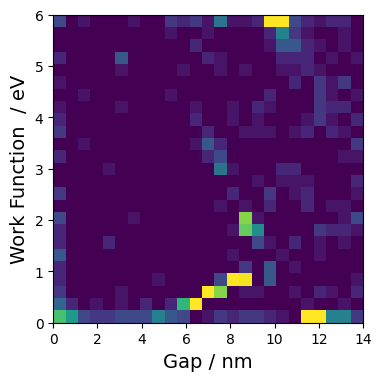

In [ ]:
xx=[]
yy=[]
for s in statDic:
    stats=statDic[s]

    Ss=[]
    Phi0s=[]
    for channel in stats:
        Ss.append(stats[channel].params['S'].value)
        Phi0s.append(stats[channel].params['phi0'].value)
    xx.extend(Ss)
    yy.extend(Phi0s)    
    #plt.plot(np.array( Ss)/10,Phi0s,'.' )
    #plt.xlabel("S (nm)")
    #plt.ylabel("Phi0 (eV)")
    
#plt.show()
plt.figure(figsize=(4, 4))
#cm = plt.cm.coolwarm
plt.hist2d(xx, yy, bins=[25, 25], range=[[0, 14], [0, 6]], density=1, vmin=0, vmax=.2)
 
plt.xlabel('Gap / nm', fontsize = 14)
plt.ylabel('Work Function  / eV', fontsize = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)    
plt.show()

In [ ]:
def I(v,S,phi0,K,R,area): #returns amps/m^2
    s1=6/K/phi0

    s2=np.where(v<phi0,S*(1-46/(3*phi0*K*S+20-2*v*K*S))+s1 ,(phi0*K*S-28)/K/v )
    ds=s2-s1
    phi=phi0-(v/2/S)*(s1+s2)-(5.75/K/(s2-s1))*np.log(s2/s1*(S-s1)/(S-s2))

    return   v*R+ (area*1e-12)* 1e6* (6.2e10/ds/ds)*(  phi*np.exp(-1.025*ds*phi**.5)-(phi+v)*np.exp(-1.025*ds*(phi+v)**.5) )

def residual(pars, x, data=None):
    model =1e9* I(x,pars['S'],pars['phi0'], pars['K'],pars['R'],pars['area'])
    model[(np.isnan(model))]=0
    if data is None:
        return model
    return model - data

steps={}
for file in fileList:
    outs={}

    props,ts,currents,bias =loadData2(file )
    for channel in currents: 
        cCurrent = currents[channel]
        bbias = bias[np.abs(cCurrent)<11]
        if np.max(bbias)>.075:
            cCurrent = cCurrent[np.abs(cCurrent)<11]
            area =2 # um^2
            fit_params = create_params(S=dict(value=7, max=20, min=0.001),
                                    phi0=dict(value=4.4, max=6, min=3),
                                    K=dict(value=40, max=80, min=0.1),
                                    R=dict(value=1e-20, max=1e-6, min=0),
                                    area = dict(value = area, max=area*1.05, min= .05)
                                    )

            out = minimize(residual, fit_params, args=(bbias,), kws={'data':  cCurrent  })
            outs[channel]=(out)
            plt.semilogy(bbias,  (np.abs(cCurrent)))
            plt.semilogy(bbias, (np.abs(residual(out.params, bbias))))
            plt.xlabel("Bias (V)")
            plt.ylabel("Current (nA)")
            plt.title(channel)
            
            plt.show()
    
    steps[file]=outs



In [ ]:
outs['S2'].params

name,value,initial value,min,max,vary
S,9.18529194,7,1.0000e-03,12.0000000,True
phi0,5.99984376,4.4,3.00000000,6.00000000,True
K,80.0000000,40,0.10000000,80.0000000,True
R,1.0000e-14,1e-14,0.00000000,1.0000e-09,True
area,0.05000003,2,0.05000000,2.10000000,True
